LIbaries used:


- **OS**: Provides functions to interact with the operating system, such as reading directories, creating folders, and working with file paths.
- **Shutil**: Used for high-level file operations like copying, moving, or deleting files and directories.
- **Cv2 (OpenCV)**: A computer vision library for reading, processing, and manipulating images (e.g., resizing, filtering, displaying).
- **Numpy**: Supports numerical operations and handling image data as arrays, which is essential for machine learning and image processing.
- **Matplotlib.pyplot**: A plotting library used to visualize data and display images in notebook-friendly formats.
- **Hashlib**: Provides tools for creating hash values (e.g., MD5, SHA-256), useful for checking data integrity or detecting duplicate images.
-**Tensorflow**: Machine learning


In [ ]:
!pip install icrawler --quiet
!pip install pillow --quiet
import os
import requests
import numpy as np
import cv2
import hashlib
!pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

from PIL import Image
from icrawler.builtin import BingImageCrawler
import shutil
from google.colab import files

Create output directories

In [ ]:
output_dir = 'High_traffic'
os.makedirs(output_dir, exist_ok=True)
output_dir = 'Low_traffic'
os.makedirs(output_dir, exist_ok=True)

Tries to open the file as an image using Pillow (Image.open()).

**.verify()** checks if the image is corrupted without actually loading it into memory.

If an exception is raised (meaning the file is not a valid image or is corrupted), it:

-Prints a message saying the file is removed.

-Deletes the file from the folder.

In [ ]:
def verify_and_clean_images(folder):
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            img = Image.open(filepath)
            img.verify()  # check if image is corrupted
        except Exception as e:
            print(f"Removed invalid image: {filename}")
            os.remove(filepath)

This line starts the crawling process.

**keyword**='Kenya roads with few to no cars on the road': this is the search phrase used to find images.

max_num=150: tells the crawler to download up to 150 images.

In [ ]:
high_traffic_dir = 'High_traffic'
low_traffic_dir = 'Low_traffic'

crawler_high = BingImageCrawler(storage={'root_dir': high_traffic_dir})
crawler_high.crawl(keyword='Kenya road traffic congestion, Kenya road gridlock, Kenya road jam', max_num=350)


ERROR:downloader:Response status code 500, file https://i.kinja-img.com/image/upload/c_fill,h_900,q_60,w_1600/53c5bffa52fee1b5465b6286f8e34e26.jpg
ERROR:downloader:Response status code 403, file https://www.theeastafrican.co.ke/resource/image/1342910/landscape_ratio3x2/1200/800/1bc6bf7c604ca8aab8df27d500b6c93d/Il/taru-jam.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Jam_in_Nairobi's_streets.jpg
ERROR:downloader:Exception caught when downloading file https://thekenyatimes.com/wp-content/uploads/2023/12/Traffic-jam.jpg, error: HTTPSConnectionPool(host='thekenyatimes.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/531015055/photo/traffic.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/490704233/photo/the-view-from-a-taxi-on-the-busy-streets-of-nairobi-kenya-east-africa-african-traf

In [ ]:
crawler_low = BingImageCrawler(storage={'root_dir': low_traffic_dir})
crawler_low.crawl(keyword='Kenya roads with few cars on the road, Kenya light traffic', max_num=350)

ERROR:downloader:Response status code 500, file https://i.kinja-img.com/image/upload/c_fill,h_900,q_60,w_1600/53c5bffa52fee1b5465b6286f8e34e26.jpg
ERROR:downloader:Response status code 400, file https://netstorage-tuko.akamaized.net/images/0fgjhs5aiiinktilm.jpg
ERROR:downloader:Response status code 400, file https://netstorage-tuko.akamaized.net/images/0fgjhs2sdphsrg03rg.jpg
ERROR:downloader:Response status code 403, file https://preview.redd.it/r2f9z7ia1ql51.jpg
ERROR:downloader:Response status code 500, file https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/53c5bffa52fee1b5465b6286f8e34e26.jpg
ERROR:downloader:Response status code 404, file https://i0.wp.com/integrum.co.ke/wp-content/uploads/2021/05/road-construction-costs-per-km-kenya.jpg
ERROR:downloader:Response status code 403, file https://nation.africa/resource/image/4417560/portrait_ratio1x1/1600/1600/4a3feee4e2cc54e809a7ad79e5296d5/VZ/thika-rd-pix.jpg
ERROR:download

 Clean bad/corrupted images

In [ ]:
shutil.make_archive('low_traffic_images', 'zip', output_dir)
files.download('low_traffic_images.zip')
shutil.make_archive('high_traffic_images', 'zip', output_dir)
files.download('high_traffic_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Create paths to the file

In [ ]:
high_traffic_path = r"/content/high_traffic_images"
low_traffic_path = r"/content/low_traffic_images"

### Function Summary: `remove_duplicate_images()`

Removes visually duplicate images from a folder by comparing image content.

**How it works:**
- Converts each image into bytes after resizing to `224x224`.
- Generates an MD5 hash for each image using `hashlib`.
- If an image's hash already exists, it is marked as a duplicate and deleted.

**Use :**  
Helps clean datasets by removing duplicate or redundant images, ensuring better training data quality.

**Libraries used:**

- `hashlib` – to generate image hashes
- `os` – to manage file paths and delete files


In [ ]:
import os
import hashlib

def remove_duplicate_images(folder_path):
    hashes = set()
    duplicates = 0

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        try:
            with open(file_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()

            if file_hash in hashes:
                print(f"Removing duplicate: {filename}")
                os.remove(file_path)
                duplicates += 1
            else:
                hashes.add(file_hash)
        except Exception as e:
            print(f"Error checking {filename}: {e}")

    print(f"Removed {duplicates} duplicate images from {folder_path}")


In [ ]:
remove_duplicate_images('High_traffic')
remove_duplicate_images('Low_traffic')

Error checking .ipynb_checkpoints: [Errno 21] Is a directory: 'High_traffic/.ipynb_checkpoints'
Removed 0 duplicate images from High_traffic
Error checking .ipynb_checkpoints: [Errno 21] Is a directory: 'Low_traffic/.ipynb_checkpoints'
Removed 0 duplicate images from Low_traffic


Removing Blurry Images

The code uses a function **is_blurry(img)** to check if an image is blurry.

It then uses the **Laplacian variance method** to measure image sharpness.

In [ ]:
def is_blurry(image, threshold=100.0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()
    return variance < threshold

def process_folder(folder_path):
    blurry_count = 0
    total = 0

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if os.path.isfile(file_path):
            img = cv2.imread(file_path)
            if img is not None:
                total += 1
                if is_blurry(img):
                    blurry_count += 1
    return blurry_count, total
# Remove blurry images from the high_traffic folder
blurry_high, total_high = process_folder('High_traffic')
if blurry_high > 0:
    print(f"\nRemoving {blurry_high} blurry images from High_traffic...")
    for file in os.listdir('High_traffic'):
        file_path = os.path.join('High_traffic', file)
        if os.path.isfile(file_path):
            img = cv2.imread(file_path)
            if img is not None and is_blurry(img):
                os.remove(file_path)
                print(f"Removed blurry image: {file}")
else:
    print(f"\nNo blurry images found in High_traffic.")


# Remove blurry images from the low_traffic folder
blurry_low, total_low = process_folder('Low_traffic')
if blurry_low > 0:
    print(f"\nRemoving {blurry_low} blurry images from Low_traffic...")
    for file in os.listdir('Low_traffic'):
        file_path = os.path.join('Low_traffic', file)
        if os.path.isfile(file_path):
            img = cv2.imread(file_path)
            if img is not None and is_blurry(img):
                os.remove(file_path)
                print(f"Removed blurry image: {file}")
else:
     print(f"\nNo blurry images found in Low_traffic.")


Removing 11 blurry images from High_traffic...
Removed blurry image: 000073.jpg
Removed blurry image: 000068.jpg
Removed blurry image: 000130.jpg
Removed blurry image: 000065.jpg
Removed blurry image: 000194.jpg
Removed blurry image: 000008.jpg
Removed blurry image: 000156.jpg
Removed blurry image: 000196.jpg
Removed blurry image: 000109.jpg
Removed blurry image: 000113.jpg
Removed blurry image: 000177.jpg

Removing 4 blurry images from Low_traffic...
Removed blurry image: 000023.jpg
Removed blurry image: 000214.jpg
Removed blurry image: 000185.jpg
Removed blurry image: 000210.jpg


This code is a basic check to see if an image file could be read and if it contains any pixel data before proceeding with further image processing steps.

In [ ]:
img = cv2.imread('/content/high_traffic')
if img is None or img.size == 0:
    pass


This code provides a way to check if an image is likely blank or contains very little variation in pixel values. If it is, no action is taken in the subsequent block

In [ ]:
def is_blank(img, threshold=10):
    return np.std(img) < threshold
    if is_blank(img):
      pass

This code is loading and preparing image data from two different categories "high traffic" and "low traffic" by assigning numerical labels and resizing the images to a consistent size.

This is a common step in setting up a dataset for image classification or other computer vision tasks.

In [ ]:
from collections import Counter
import numpy as np

# Load images and labels
def load_images(data_dir, category_label, img_size=224):
    images = []
    labels = []
    if not os.path.exists(data_dir):
        print(f"Error: Directory not found at {data_dir}")
        return images, labels
    for img_file in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_file)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(category_label)
            else:
                print(f"Warning: Could not read image file: {img_file}")
    return images, labels


x_high, y_high = load_images('High_traffic', 0, img_size=224)
x_low, y_low = load_images('Low_traffic', 1, img_size=224)

# Concatenate the data
x = np.concatenate((x_high, x_low), axis=0)
y = np.concatenate((y_high, y_low), axis=0)

class_counts = Counter(y)
print("Class distribution:", class_counts)

Class distribution: Counter({np.int64(1): 120, np.int64(0): 119})


**Img_size=224**: This is a parameter with a default value of 224. It specifies the desired size width and height to which each image will be resized.

Ensures all images are a consistent size and have an associated category label.

In [ ]:
def load_images(data_dir, category_label, img_size=224):

    images = []
    labels = []

    
    if not os.path.exists(data_dir):
        print(f"Error: Directory not found at {data_dir}")
        return images, labels 

    for img_file in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_file)

        
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)

            if img is not None:
                # Resize the image
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(category_label)
            else:
                print(f"Warning: Could not read image file: {img_file}")

    return images, labels

It resizes all loaded images to 224x224 pixels.

**All_images = np.array(high_images + low_images)**: This line concatenates the high_images and low_images lists and then converts the combined list into a single NumPy array named all_images.

 Responsible for loading all the prepared images from your high and low traffic folders, combining them into unified datasets all_images and all_labels, and providing a summary of the loaded data's dimensions.

In [ ]:
high_images, high_labels = load_images('High_traffic', category_label=0, img_size=224)
low_images, low_labels = load_images('Low_traffic', category_label=1, img_size=224)

all_images = np.array(high_images + low_images)
all_labels = np.array(high_labels + low_labels)

print(f"Loaded {len(high_images)} high traffic images and {len(low_images)} low traffic images.")
print(f"Total images loaded: {len(all_images)}")
print(f"Shape of all_images: {all_images.shape}")
print(f"Shape of all_labels: {all_labels.shape}")

Loaded 119 high traffic images and 120 low traffic images.
Total images loaded: 239
Shape of all_images: (239, 224, 224, 3)
Shape of all_labels: (239,)


In [ ]:
x_high, y_high = load_images('High_traffic', 0, img_size=224)
x_low, y_low = load_images('Low_traffic', 1, img_size=224)


# Concatenate the data
import numpy as np
x = np.concatenate((x_high, x_low), axis=0)
y = np.concatenate((y_high, y_low), axis=0)

print("Data loaded and concatenated successfully.")
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Data loaded and concatenated successfully.
Shape of x: (239, 224, 224, 3)
Shape of y: (239,)


Sample visual output

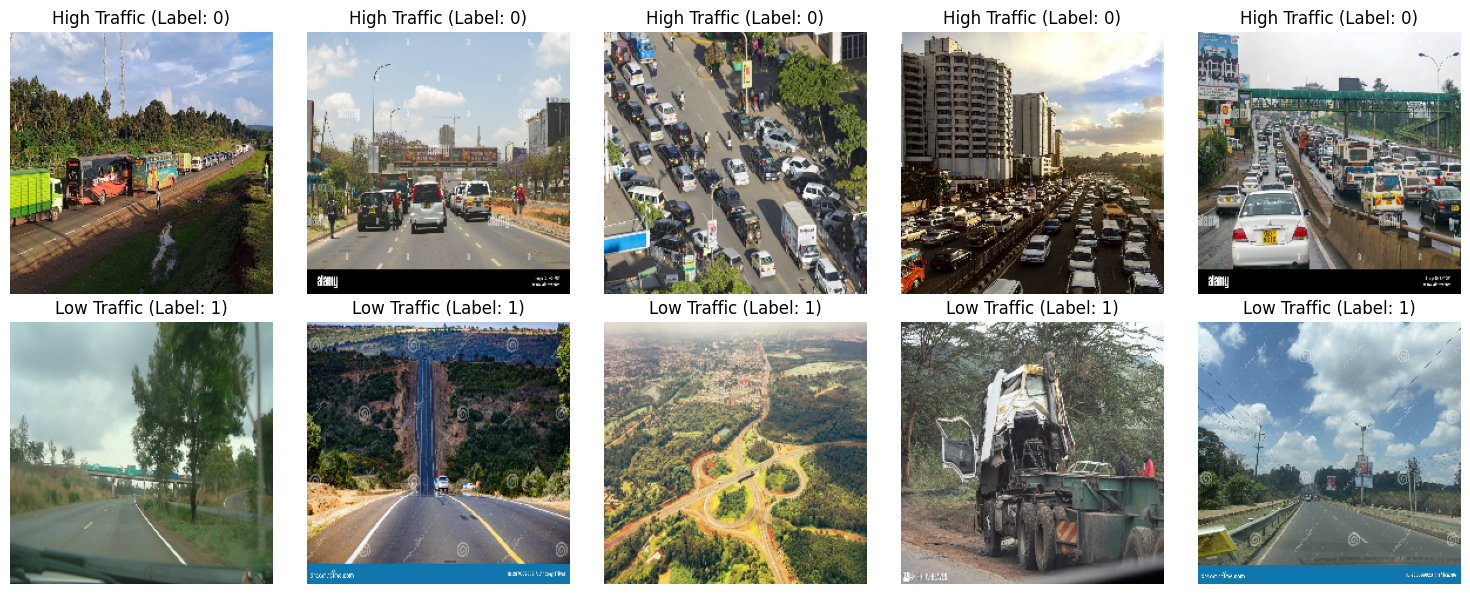

In [ ]:
!pip install matplotlib --quiet
import matplotlib.pyplot as plt
import cv2 # Import cv2 to use cv2.cvtColor

num_samples = min(len(high_images), len(low_images), 5)

num_samples = min(len(high_images), len(low_images), 5)


if num_samples > 0:
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

for i in range(num_samples):
    # Convert BGR to RGB before displaying and include the assigned label in the title
    axes[0, i].imshow(cv2.cvtColor(high_images[i], cv2.COLOR_BGR2RGB))
    # Assuming high_labels[i] corresponds to the image being displayed
    axes[0, i].set_title(f"High Traffic (Label: {high_labels[i]})")
    axes[0, i].axis("off")

    # Convert BGR to RGB before displaying and include the assigned label in the title
    axes[1, i].imshow(cv2.cvtColor(low_images[i], cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f"Low Traffic (Label: {low_labels[i]})")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


- **Loads the training data** from `data_dir`, using:
  - `target_size=(224, 224)`: resizes all images to 224x224 pixels (standard input size for many CNNs like VGG, ResNet).
  - `batch_size=32`: loads images in **batches of 32**.
  - `class_mode='binary'`: tells Keras this is a **binary classification** task (outputs: 0 or 1).
  - `subset='training'`: selects **only the training 80%** of the data.
  - `classes=['High_traffic', 'Low_traffic']`: **manually assigns labels**:
    - `High_traffic` → 0
    - `Low_traffic` → 1


In [ ]:
data_dir = "." # The parent directory containing 'High_traffic' and 'Low_traffic'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    classes=['High_traffic', 'Low_traffic'] # Specify the classes 
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    classes=['High_traffic', 'Low_traffic'] # Specify the classes 
)

Found 192 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Create new folders
os.makedirs("/content/dataset/train/High_traffic", exist_ok=True)
os.makedirs("/content/dataset/train/Low_traffic", exist_ok=True)
os.makedirs("/content/dataset/val/High_traffic", exist_ok=True)
os.makedirs("/content/dataset/val/Low_traffic", exist_ok=True)

# Move and split files
def move_images(source_dir, train_dir, val_dir, split_ratio=0.8):
    files = [f for f in os.listdir(source_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    train_files, val_files = train_test_split(files, train_size=split_ratio, random_state=42)

    for f in train_files:
        shutil.copy(os.path.join(source_dir, f), os.path.join(train_dir, f))

    for f in val_files:
        shutil.copy(os.path.join(source_dir, f), os.path.join(val_dir, f))

# Move High Traffic images
move_images('/content/High_traffic',
            '/content/dataset/train/High_traffic',
            '/content/dataset/val/High_traffic')

# Move Low Traffic images
move_images('/content/Low_traffic',
            '/content/dataset/train/Low_traffic',
            '/content/dataset/val/Low_traffic')


## Image Dataset Preparation for Binary Classification

This script organizes images of traffic into **training** and **validation** sets, preparing them for deep learning tasks such as **binary image classification** using Keras or PyTorch.

---

##  Data Loading

- **DataLoader**: Batches and optionally shuffles the data.
- **batch_size=32**: Feeds the model 32 images at a time.
- **shuffle=True**: Randomizes training data order for each epoch to improve generalization.

---

## Model: ResNet50 (Pretrained)

- Loads a **ResNet50 model** pretrained on ImageNet.

```python
for param in model.parameters():
    param.requires_grad = False


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch import nn, optim

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load data
train_data = datasets.ImageFolder('/content/dataset/train', transform=transform)
val_data = datasets.ImageFolder('/content/dataset/val', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32)

# Load pre-trained model
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # Freeze feature extractor

# Replace final layer
model.fc = nn.Linear(model.fc.in_features, 2)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### `model.train()` -
This enables layers like **dropout** and **batch normalization**  to behave correctly during training.

### `running_loss = 0.0`
Initializes a variable to **accumulate the total loss** for each epoch.

### `for images, labels in train_loader:`
Iterates over the training data in **mini-batches**

### `optimizer.zero_grad()`
Clears previously **accumulated gradients**. This must be done before each backward pass to avoid gradient accumulation

### `outputs = model(images)`
Passes the batch of images through the model to obtain **predictions (logits)**.

### `loss = criterion(outputs, labels)`
Calculates the **loss** between predictions and actual labels using the specified loss function

### `loss.backward()`
Computes the **gradients** of the loss with respect to model parameters using **backpropagation**.

### `optimizer.step()`
Updates the model’s parameters using the **computed gradients**.

### `running_loss += loss.item()`
Adds the current batch **loss (as a float)** to the running total for the epoch.

### `print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")`
Displays the **total loss** for the current epoch, helping you **track training progress**.



In [ ]:
for epoch in range(10):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")


Epoch 1, Loss: 1.7138
Epoch 2, Loss: 1.9133
Epoch 3, Loss: 1.7479
Epoch 4, Loss: 1.7533
Epoch 5, Loss: 1.6456
Epoch 6, Loss: 1.4821
Epoch 7, Loss: 1.5592
Epoch 8, Loss: 1.6234
Epoch 9, Loss: 1.8104
Epoch 10, Loss: 2.1129


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

print(confusion_matrix(all_labels, all_preds))
print(classification_report(all_labels, all_preds, target_names=['Low Traffic', 'High Traffic']))


[[20  4]
 [ 5 44]]
              precision    recall  f1-score   support

 Low Traffic       0.80      0.83      0.82        24
High Traffic       0.92      0.90      0.91        49

    accuracy                           0.88        73
   macro avg       0.86      0.87      0.86        73
weighted avg       0.88      0.88      0.88        73



Freeze other layers Unfreeze the last convolutional block, fine tuning

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for name, param in model.named_parameters():
    if "layer4" in name:  # This is the last residual block of ResNet50
        param.requires_grad = True


Only update trainable parameters

In [ ]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)


### `optimizer.zero_grad()`
Clears any previously stored gradients. This is essential to prevent accumulation of gradients across batches.

### `outputs = model(inputs)`
Feeds the input batch through the model, producing raw predictions (logits or probabilities depending on the final layer).

### `optimizer.step()`
Updates the model’s parameters based on the computed gradients using an optimization algorithm like **Adam** or **SGD**.

### `total_loss += loss.item()`
Adds the current batch’s scalar loss to the cumulative loss for the epoch.

An epoch is one complete pass through the entire training dataset by the learning algorithm.

- Multiple epochs allow the model to refine its internal parameters (weights) and improve its performance over time.

- Convergence: More epochs help the model gradually reduce the loss and converge to better accuracy, assuming you're not overfitting.

In [ ]:
for epoch in range(5):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Fine-tuning Loss: {total_loss:.4f}")


Epoch 1 Fine-tuning Loss: 3.6636
Epoch 2 Fine-tuning Loss: 1.5953
Epoch 3 Fine-tuning Loss: 1.1911
Epoch 4 Fine-tuning Loss: 0.7602
Epoch 5 Fine-tuning Loss: 1.0436


In [ ]:
!pip install torchcam --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


**A sample of the Prediction**

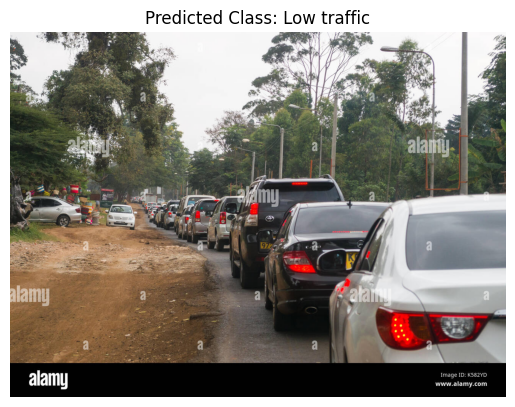

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms

# --- Load model ---
model = models.resnet50(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load('model_resnet50.pth', map_location=torch.device('cpu')))
model.eval()

# --- Load and prepare image ---
img_path = '/content/High_traffic/000004.jpg'  # Change as needed
image = Image.open(img_path).convert('RGB')  # Keep RGB because model expects 3 channels

# Transform for model prediction
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0)

# --- Predict class ---
with torch.no_grad():
    output = model(input_tensor)
    pred_class = output.argmax().item()

# --- Show the raw image with predicted label ---
plt.imshow(image)
plt.title(f"Predicted Class: {'High traffic' if pred_class else 'Low traffic'}")
plt.axis('off')
plt.show()


**torch.no_grad()**: Improves speed and memory efficiency during inference.

**torch.max(outputs, 1)**: Gets predicted class index.

A **confusion matrix** is a square matrix that compares the true labels with the predicted labels. It shows how many predictions your model got right and where it made mistakes.

- **True Positives (TP)** = 11  
  The model correctly predicted High Traffic.

- **False Negatives (FN)** = 18  
  The model predicted Low Traffic, but it was actually High Traffic.

- **False Positives (FP)** = 22  
  The model predicted High Traffic, but it was actually Low Traffic.

- **True Negatives (TN)** = 7  
  The model correctly predicted Low Traffic.

- **Accuracy** = (TP + TN) / Total  
  = (11 + 7) / (11 + 18 + 22 + 7)  
  = 18 / 58 ≈ **31.0%**

- **Precision (High Traffic)** = TP / (TP + FP)  
  = 11 / (11 + 22) ≈ **33.3%**

- **Recall (High Traffic)** = TP / (TP + FN)  
  = 11 / (11 + 18) ≈ **37.9%**

- **F1-Score** = 2 × (Precision × Recall) / (Precision + Recall)  
  = 2 × (0.333 × 0.379) / (0.333 + 0.379) ≈ **35.4%**

  Fine Tuning needed

Sample y_true: [0 0 0 0 0 0 0 0 0 0]
Sample y_pred: [0 0 0 0 0 0 0 0 1 0]
Unique labels in y_true: [0 1]
Unique labels in y_pred: [0 1]

Confusion Matrix:
 [[20  4]
 [ 5 44]]


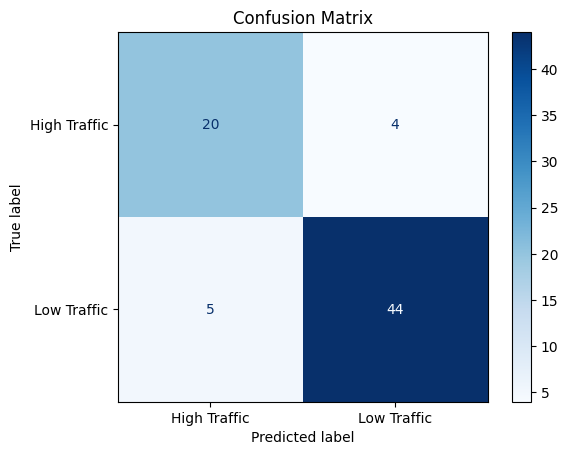


Classification Report:
              precision    recall  f1-score   support

High Traffic       0.80      0.83      0.82        24
 Low Traffic       0.92      0.90      0.91        49

    accuracy                           0.88        73
   macro avg       0.86      0.87      0.86        73
weighted avg       0.88      0.88      0.88        73



In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np # Import numpy for converting tensors to numpy arrays
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Check if model and val_loader are defined
if 'model' not in locals() and 'model' not in globals():
    print("Error: 'model' is not defined. Please ensure the model is loaded or defined.")
    
    exit()

if 'val_loader' not in locals() and 'val_loader' not in globals():
     print("Error: 'val_loader' is not defined. Please ensure the validation data loader is created.")
     
     exit()


y_true = []
y_pred = []

model.eval()  # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for evaluation
    for inputs, labels in val_loader:
        # Move data to the same device as the model if necessary 
        # inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1) # Get the predicted class index

        y_true.extend(labels.cpu().numpy()) # Move labels to CPU and convert to numpy
        y_pred.extend(preds.cpu().numpy()) # Move predictions to CPU and convert to numpy

# Convert lists to numpy arrays for scikit-learn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print some samples to verify
print("Sample y_true:", y_true[:10])
print("Sample y_pred:", y_pred[:10])
print("Unique labels in y_true:", np.unique(y_true))
print("Unique labels in y_pred:", np.unique(y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
# Define display labels according to your class mapping 
# Check the class_to_idx attribute of your ImageFolder dataset 
display_labels = ['High Traffic', 'Low Traffic'] # Adjust based on your dataset mapping

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues) # Use a colormap like Blues
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=display_labels))

Class Count, an unbalanced could lower the accuracy of the model

In [ ]:
from collections import Counter
import numpy as np

# Check if train_data is defined
if 'train_data' not in locals() and 'train_data' not in globals():
    print("Error: 'train_data' is not defined. Please ensure the training dataset is created.")
    exit()

# Get targets from the dataset
targets = [sample[1] for sample in train_data]  # ImageFolder returns (image, label) pairs

# Count how many samples of each class exist
class_counts = Counter(targets)

# Get the mapping from class index to class name
class_names = train_data.classes  

# Print class counts with corresponding names
print("Class counts:")
for class_index, count in class_counts.items():
    class_name = class_names[class_index] if class_index < len(class_names) else f"Unknown ({class_index})"
    print(f"  {class_name} ({class_index}): {count}")



Class counts:
  High_traffic (0): 116
  Low_traffic (1): 113


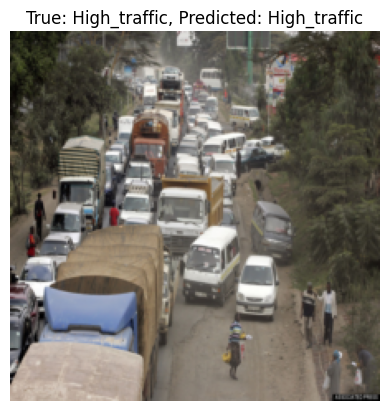

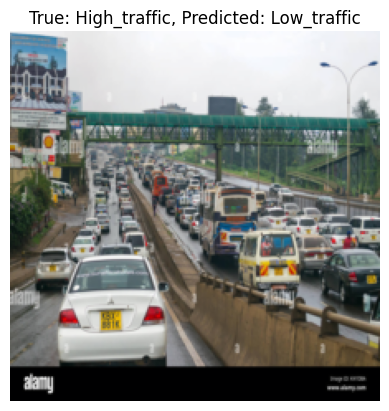

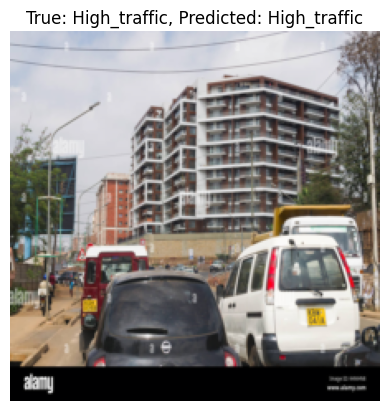

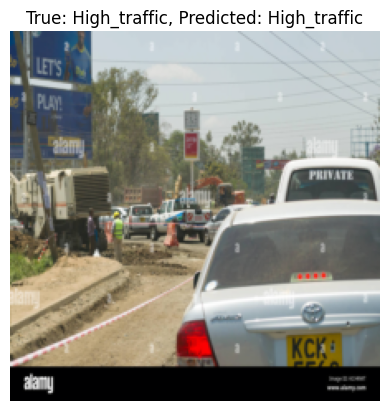

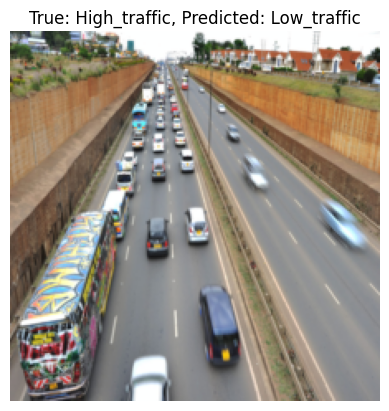

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for denormalization

class_names = train_data.classes

# Define the mean and standard deviation used for normalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        for i in range(min(5, len(inputs))):
            # Get the image tensor
            img_tensor = inputs[i].cpu().numpy()

            # Denormalize the image
            # Reverse the normalization: img = (img * std) + mean
            img_denormalized = img_tensor * std[:, np.newaxis, np.newaxis] + mean[:, np.newaxis, np.newaxis]

            # Transpose the image from (C, H, W) to (H, W, C) for matplotlib display
            img_denormalized = np.transpose(img_denormalized, (1, 2, 0))

            # Clip values to the valid range [0, 1]
            img_denormalized = np.clip(img_denormalized, 0, 1)

            # Display the denormalized image
            plt.imshow(img_denormalized)
            plt.title(f"True: {class_names[labels[i]]}, Predicted: {class_names[preds[i]]}")
            plt.axis('off')
            plt.show()
        break  # Only show first batch

- **`transforms.Resize((180, 180))`**  
  Resizes all images to a fixed size of **180x180 pixels** to ensure consistent input dimensions for the neural network.

- **`transforms.RandomHorizontalFlip()`**  
  Randomly flips images horizontally with a **50% probability**. This helps the model learn features that are **invariant to left-right orientation**, improving generalization.

- **`transforms.RandomRotation(10)`**  
  Randomly rotates the image within **±10 degrees**. This simulates different viewing angles and introduces rotational variance in the dataset.

- **`transforms.ColorJitter(brightness=0.2, contrast=0.2)`**  
  Randomly alters brightness and contrast to mimic varying lighting conditions:
  - `brightness=0.2`: Adjusts brightness by a factor in the range **[0.8, 1.2]**
  - `contrast=0.2`: Adjusts contrast by a factor in the range **[0.8, 1.2]**
  
- **`transforms.ToTensor()`**  
  Converts a PIL Image or NumPy `ndarray` into a **PyTorch tensor** and scales the pixel values to the range **[0.0, 1.0]**.

These transformations are used as **data augmentation** techniques to increase the diversity of the training dataset and help prevent overfitting.


In [ ]:
from torchvision import transforms

transform_train = transforms.Compose([
    transforms.Resize((180, 180)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])


**Accuracy**: 44/58=0.76

Further training the model improved accuracy


In [ ]:
correct = 0
total = 0

for inputs, labels in val_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

print(f"Accuracy: {correct}/{total} = {correct/total:.2f}")


Accuracy: 44/58 = 0.76


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define placeholders to store history
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation loop
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_running_loss / len(val_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")


Epoch 1/10
  Train Loss: 0.7070 | Train Acc: 0.4716
  Val   Loss: 0.7186 | Val   Acc: 0.3966
Epoch 2/10
  Train Loss: 0.6675 | Train Acc: 0.6070
  Val   Loss: 0.6605 | Val   Acc: 0.6552
Epoch 3/10
  Train Loss: 0.6477 | Train Acc: 0.6507
  Val   Loss: 0.6380 | Val   Acc: 0.7069
Epoch 4/10
  Train Loss: 0.6211 | Train Acc: 0.7293
  Val   Loss: 0.6091 | Val   Acc: 0.7241
Epoch 5/10
  Train Loss: 0.6124 | Train Acc: 0.7336
  Val   Loss: 0.5797 | Val   Acc: 0.7931
Epoch 6/10
  Train Loss: 0.5896 | Train Acc: 0.7467
  Val   Loss: 0.5654 | Val   Acc: 0.7759
Epoch 7/10
  Train Loss: 0.5559 | Train Acc: 0.7773
  Val   Loss: 0.5467 | Val   Acc: 0.8276
Epoch 8/10
  Train Loss: 0.5590 | Train Acc: 0.7817
  Val   Loss: 0.5364 | Val   Acc: 0.8276
Epoch 9/10
  Train Loss: 0.5442 | Train Acc: 0.7511
  Val   Loss: 0.5463 | Val   Acc: 0.7414
Epoch 10/10
  Train Loss: 0.5430 | Train Acc: 0.7773
  Val   Loss: 0.5266 | Val   Acc: 0.7586


These plots are valuable for monitoring your model's training progress.

Consistent simultaneous increase and decrease shows a well trained model.

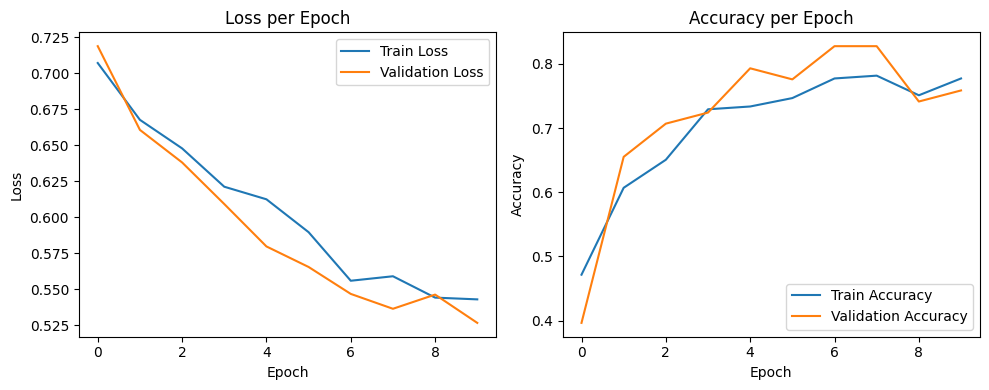

In [ ]:
# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()


**Visual Prediction with improved accuracy**

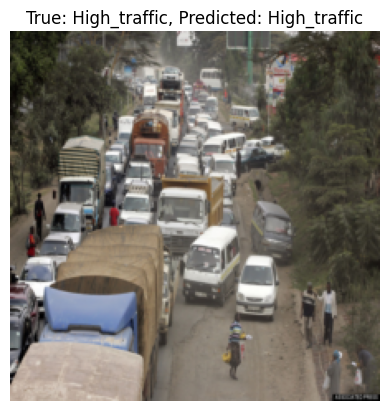

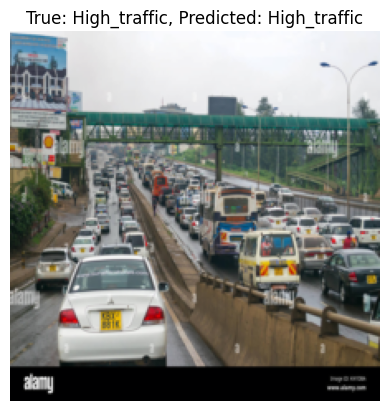

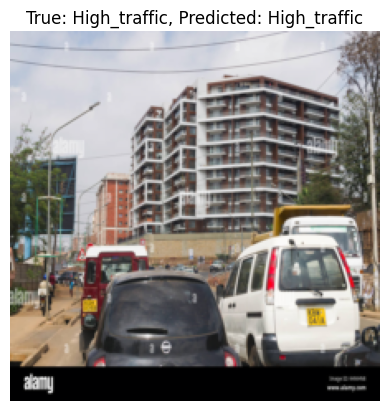

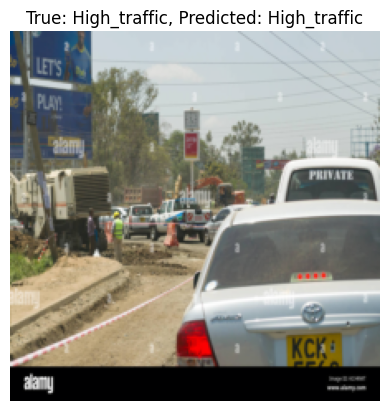

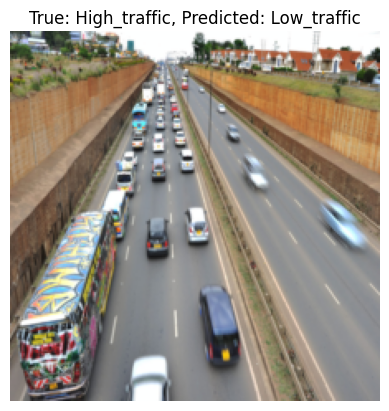

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for denormalization

class_names = train_data.classes

# Define the mean and standard deviation used for normalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        for i in range(min(5, len(inputs))):
            # Get the image tensor
            img_tensor = inputs[i].cpu().numpy()

            # Denormalize the image
            # Reverse the normalization: img = (img * std) + mean
            img_denormalized = img_tensor * std[:, np.newaxis, np.newaxis] + mean[:, np.newaxis, np.newaxis]

            # Transpose the image from (C, H, W) to (H, W, C) for matplotlib display
            img_denormalized = np.transpose(img_denormalized, (1, 2, 0))

            # Clip values to the valid range [0, 1]
            img_denormalized = np.clip(img_denormalized, 0, 1)

            # Display the denormalized image
            plt.imshow(img_denormalized)
            plt.title(f"True: {class_names[labels[i]]}, Predicted: {class_names[preds[i]]}")
            plt.axis('off')
            plt.show()
        break  # Only show first batch

**ReduceLROnPlateau** reduces the learning rate when validation loss has stopped improving.

This helps the model to converge better and avoid overshooting the minimum during training.

Helps escape plateaus and local minima.

Encourages finer adjustments to weights in later training phases.

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2)


`scheduler.step(val_loss)` **monitors the validation loss** passed to it.
- If the validation loss has **not decreased** for a number of consecutive epochs (`patience`), the scheduler will:
  - Reduce the **learning rate** of the optimizer.

Prevents wasting time with a learning rate that is too high when loss is no longer decreasing.

In [ ]:
scheduler.step(val_loss)


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)


**Increasing the accuracy further while looking to avoid overfitting**

In [ ]:
best_val_loss = float('inf')
num_epochs = 5
patience = 3
counter = 0

for epoch in range(num_epochs):
    ...
    val_loss, val_acc = validate(model, val_loader, criterion)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

Early stopping triggered.


Model Accuracy plateaus at 0.86

In [ ]:
correct = 0
total = 0

for inputs, labels in val_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

print(f"Accuracy: {correct}/{total} = {correct/total:.2f}")


Accuracy: 50/58 = 0.86


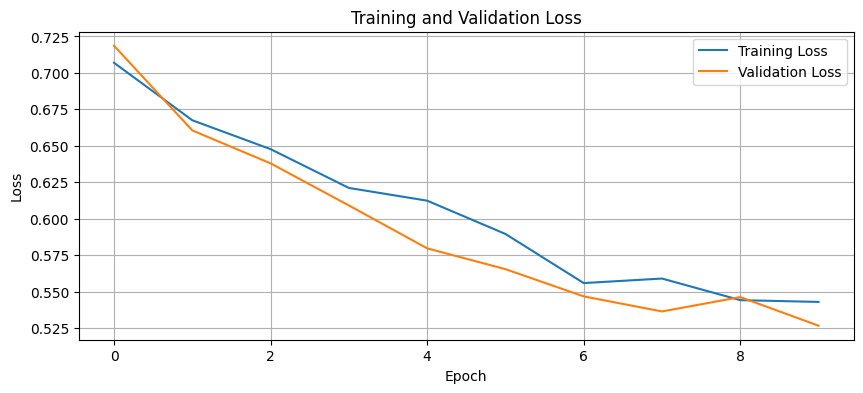

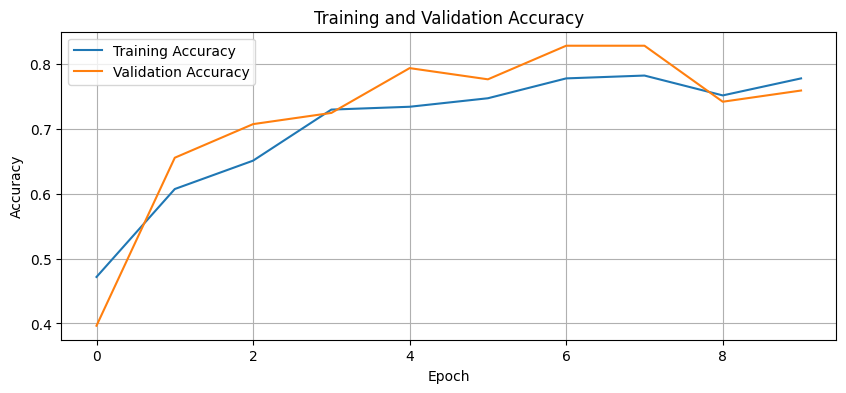

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from PIL import Image
import torch
from torchvision import transforms

# Load your trained model
# model = torch.load('your_model.pth', map_location=torch.device('cpu'))
# model.eval()

class DummyModel(torch.nn.Module):
    def forward(self, x):
        return torch.tensor([[0.2, 0.8]])  

model = DummyModel()
device = torch.device('cpu')

# Define transform (match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

st.title("Traffic Level Prediction Chat")

# Chat-like input
st.markdown("**Ask me if your image is high or low traffic.**")
question = st.text_input("You:", "Is this high traffic?")
image_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

if image_file is not None and question.lower() in ["is this high traffic?", "is this low traffic?", "what traffic level is this?"]
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)
        label = "High Traffic" if predicted.item() == 1 else "Low Traffic"

    # Display response
    st.markdown(f"**Model:** This looks like **{label}**.")

else:
    st.markdown("Upload an image and ask a question to get a prediction.")



2025-08-05 23:46:21.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 23:46:21.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 23:46:21.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 23:46:21.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 23:46:21.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 23:46:21.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 23:46:21.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 23:46:21.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.187.105:8501



In [ ]:
# Save the content of cell XVVV0VQ-oB-b to app.py
app_code = """
import streamlit as st
from PIL import Image
import torch
from torchvision import transforms

# Load your trained model
# Make sure 'model' and 'device' are defined and loaded
# model = torch.load('your_model.pth', map_location=torch.device('cpu'))
# model.eval()

# Example placeholder: Replace this with your model
class DummyModel(torch.nn.Module):
    def forward(self, x):
        return torch.tensor([[0.2, 0.8]])  # Pretend it's high traffic

model = DummyModel()
device = torch.device('cpu')

# Define transform (match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

st.title("Traffic Level Prediction Chat")

# Chat-like input
st.markdown("**Ask me if your image is high or low traffic.**")
question = st.text_input("You:", "Is this high traffic?")
image_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

if image_file is not None and question.lower() in ["is this high traffic?", "is this low traffic?", "what traffic level is this?"]:
    image = Image.open(image_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)
        label = "High Traffic" if predicted.item() == 1 else "Low Traffic"

    # Display response
    st.markdown(f"**Model:** This looks like **{label}**.")

else:
    st.markdown("Upload an image and ask a question to get a prediction.")

"""

with open("app.py", "w") as f:
    f.write(app_code)

print("app.py created successfully.")

app.py created successfully.
